In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('heart.csv')

# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


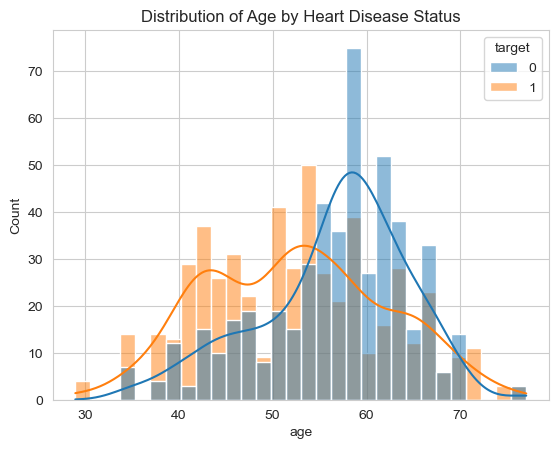

In [3]:
# Visualize the distribution of each feature
sns.set_style('whitegrid')
sns.histplot(data, x='age', hue='target', kde=True, bins=30)
plt.title('Distribution of Age by Heart Disease Status')
plt.show()

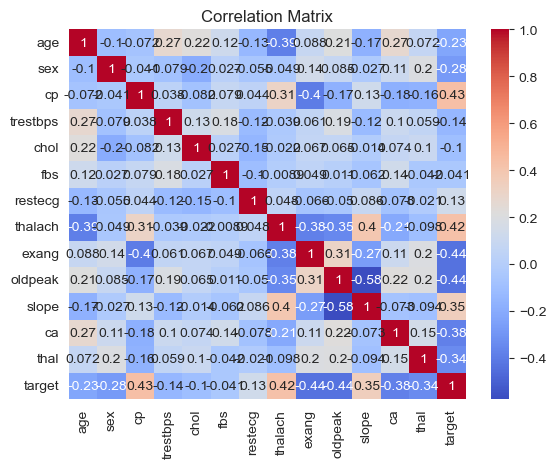

In [4]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Identify the most important risk factors using a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Get the feature importances
importances = rf.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

In [7]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. cp (0.135072)
2. ca (0.127327)
3. thalach (0.122169)
4. oldpeak (0.121905)
5. thal (0.110518)
6. age (0.077908)
7. chol (0.074822)
8. trestbps (0.071171)
9. exang (0.057594)
10. slope (0.045782)
11. sex (0.028731)
12. restecg (0.018557)
13. fbs (0.008444)


In [8]:
# Predict the target variable using the test set
y_pred = rf.predict(X_test)

In [9]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366
